---
# **Lab 10: UCI Adult Income Project**
---

In this notebook, we will be exploring the [UCI Adult Income dataset](https://archive.ics.uci.edu/dataset/2/adult), derived from the 1994 U.S. Census database. Our goal is to predict whether an individual earns more than $50,000 per year based on various demographic and employment-related features. It is well known that this analysis will uncover disparities in income predictions that are influenced by demographic features such as race and sex, highlighting the need for careful consideration of ethical practices in AI modeling.

<br>

Here's a brief description of each feature in the dataset:

- `Age`: The individual's age.
- `Workclass`: The type of employment situation of the individual (e.g., Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
- `Final-Weight`: Final weight. The number of people the census believes the entry represents.
- `Education`: The highest level of education achieved by the individual (e.g., Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).
- `Education-number-of-years`: The highest level of education achieved in numerical form.
- `Marital-status`: Marital status of the individual (e.g., Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse).
- `Occupation`: The individual's occupation (e.g., Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces).
- `Relationship`: Represents what this individual is relative to others (e.g., Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried).
- `Race`: Race of the individual (e.g., White, Asian-Pac-Islander, Amer-Indian-Eskimo, Black, Other).
- `Sex`: The individual's sex (Male, Female).
- `Capital-gain`: Continuous income from investment sources, apart from wages/salary.
- `Capital-loss`: Continuous losses from investment sources, apart from wages/salary.
- `Hours-per-week`: The number of hours the individual works per week.
- `Native-country`: Country of origin of the individual (e.g., United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands).
- `Income`: The income class (`'<=$50K'`, `'>$50K'`). This is the target variable we can aim to predict.
- `Income >50K`: The income class as a binary variable (0 or 1). This is a numerical target variable we can aim to predict.

<br>

**Run the cell below to import all necessary libraries and functions.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.metrics import *

# Load the dataset
url = "https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data" #"https://raw.githubusercontent.com/batuhansahincanel/UCIsAdultDataset/main/adult.data"
names=["Age", "Workclass", "Final-Weight", "Education", "Education-number-of-years", "Marital-status",
        "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss",
        "Hours-per-week", "Native-country", "Income"]

adult = pd.read_csv(url, names = names)
adult = adult.dropna()

adult['Income >50K'] = adult['Income'].map({' <=50K': 0, ' >50K': 1})

#### **Problem #1**

Print the first 10 rows of the data.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
adult.head(10)

,Age,Workclass,Final-Weight,Education,Education-number-of-years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income,Income >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


#### **Problem #2**

Determine how many data points and how many variables are in this dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
adult.shape

(32561, 16)

#### **Problem #3**

Now, get a general picture of the data's statistics. Then, specifically determine:

* The average and standard deviation (std) age.
* The average and standard deviation (std) of the number of individuals believed to be represented per entry.
* The average and standard deviation (std) number of hours worked per week.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
adult.describe()

,Age,Final-Weight,Education-number-of-years,Capital-gain,Capital-loss,Hours-per-week,Income >50K
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### **Problem #4**

Determine how many individuals are making 50K or more versus less than 50K.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

Either of the following works.

In [ ]:
adult['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [ ]:
adult['Income >50K'].value_counts()

0    24720
1     7841
Name: Income >50K, dtype: int64

#### **Problem #5**

Visualize the number of individuals making 50K or more versus less than 50K using a bar graph. **Is this dataset balanced?**

In [ ]:
categories = ['<50K', '>=50K']
bars = # COMPLETE THIS CODE

plt.# COMPLETE THIS CODE

plt.ylabel(# COMPLETE THIS CODE
plt.title(# COMPLETE THIS CODE

plt.show()

##### **Solution**

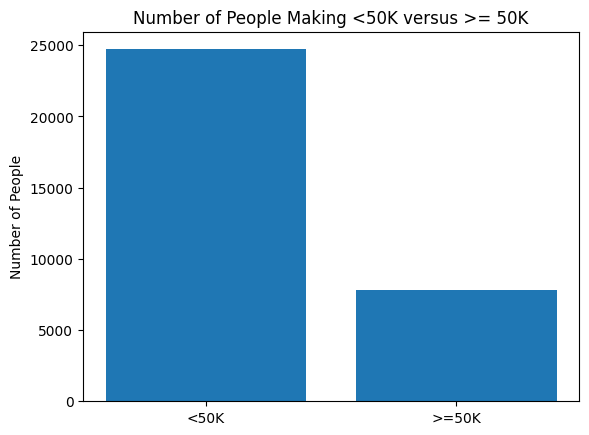

In [ ]:
categories = ['<50K', '>=50K']
bars = adult['Income'].value_counts()

plt.bar(categories, bars)

plt.ylabel('Number of People')
plt.title('Number of People Making <50K versus >= 50K')


plt.show()

##### **Follow Up**

While we do not have as much information about the exact values of earnings for the year 1994, we must remember that this is our target data. It would be ideal to have equal amounts of both categories for our model.

#### **Problem #6**

Complete the code below to create a bar graph for the sex distribution in this dataset. What do you notice in the visualization?

In [ ]:
sex_labels = adult["Sex"].# COMPLETE THIS LINE
sex_counts = adult["Sex"].# COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title('Sex Distribution in the Data')
plt.xlabel('Sex')
plt.ylabel('Number of Adults')

plt.show()

##### **Solution**

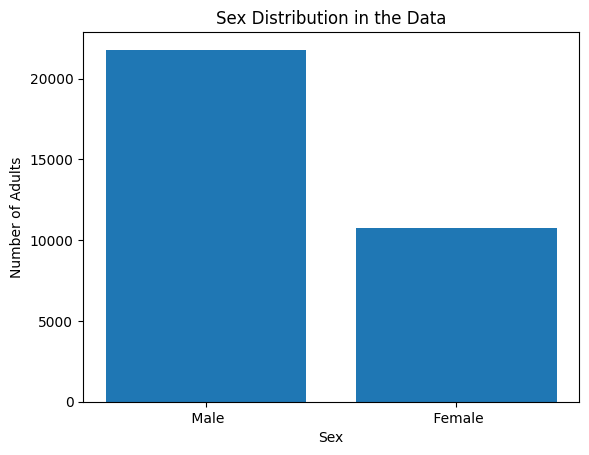

In [ ]:
sex_labels = adult["Sex"].unique()
sex_counts = adult["Sex"].value_counts()

plt.bar(sex_labels, sex_counts)

plt.title('Sex Distribution in the Data')
plt.xlabel('Sex')
plt.ylabel('Number of Adults')

plt.show()

##### **Follow Up**

You may have noticed that there is approximately double the amount of males than females in our data. This is a big red flag. If the data were truly representative of the US population in 1994, there would actually be 50.9% females compared to the 49.1% of males.

#### **Problem #7**

Complete the code below to create a bar graph for the race distribution in this dataset. What do you notice in the visualization?

<br>

Consider using the following when creating your graph to make the x-ticks more readable: `plt.xticks(rotation = 45)`.

In [ ]:
race_labels = # COMPLETE THIS LINE
race_counts = # COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title(# COMPLETE THIS LINE
plt.xlabel(# COMPLETE THIS LINE
plt.ylabel(# COMPLETE THIS LINE
plt.xticks(# COMPLETE THIS LINE

plt.show()

##### **Solution**

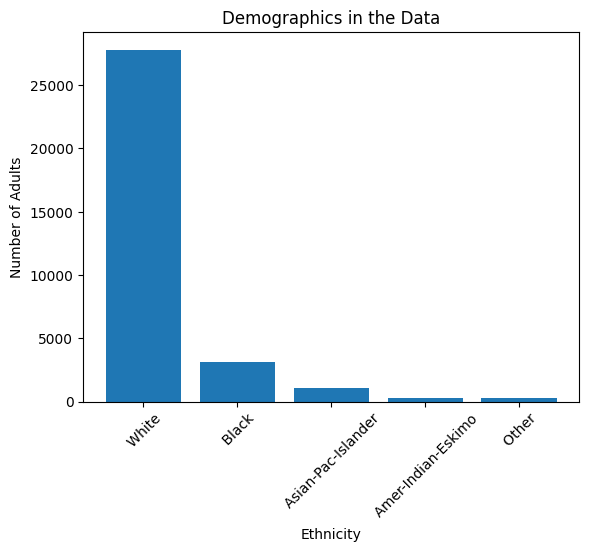

In [ ]:
race_labels = adult["Race"].unique()
race_counts = adult["Race"].value_counts()

plt.bar(race_labels, race_counts)

plt.title('Demographics in the Data')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Adults')
plt.xticks(rotation = 45)

plt.show()

##### **Follow Up**

This part of the data is also off! In the 1990s, approximately 80% of the population was white; 12% black; 1% American Indian, Eskimo, and Aleut; 3% Asian Pacific Islander; and the final 4% falling under the 'other' category. Our visual shows approximately 85% white, 10% black, and the remainder other minorities. While this ratio is not off by as large of an amount as it was for the sex distribution, this data is still misrepresenting the US population.

#### **Problem #8**

Create a bar graph for the education distribution in this dataset. What do you notice in the visualization?

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

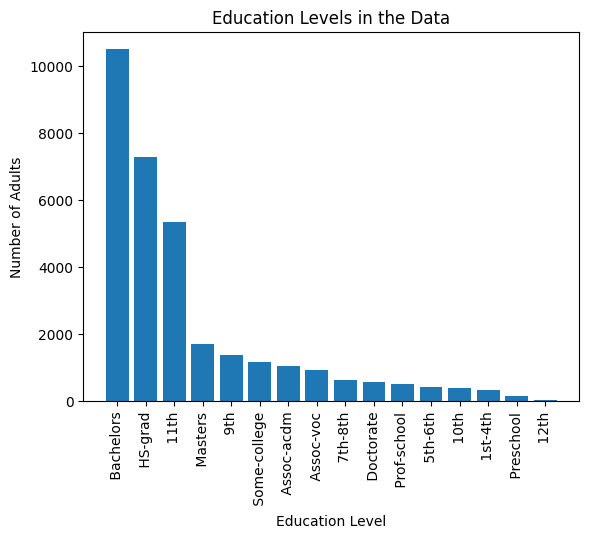

In [ ]:
education_labels = adult["Education"].unique()
education_counts = adult["Education"].value_counts()

plt.bar(education_labels, education_counts)

plt.title('Education Levels in the Data')
plt.xlabel('Education Level')
plt.ylabel('Number of Adults')
plt.xticks(rotation = 90)

plt.show()

##### **Follow Up**

The number of highschool graduates is more than 33% compared to college graduates and almost 50% more compared to individuals with bachelor's degrees.

#### **Problem #9**

Run the code cell below to modify your solution from above so that the counts for:
* `1st-4th` and `5th-6th` are grouped under a new label: `Elementary`.
* `9th`, `10th`, `11th`, `12th` are grouped under a new label: `High School`.

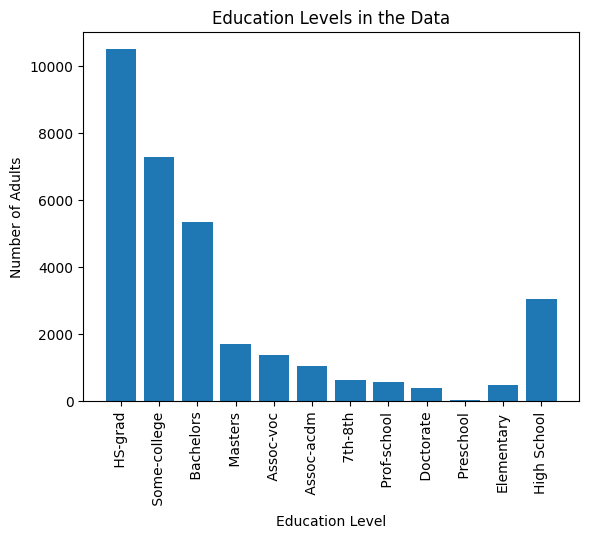

In [ ]:
education_dict = adult["Education"].value_counts().to_dict()

# Group all elementary
education_dict["Elementary"] = 0
for value in [' 1st-4th', ' 5th-6th']:
    education_dict["Elementary"] += education_dict.pop(value)

# Group all High School
education_dict["High School"] = 0
for value in [' 9th', ' 10th', ' 11th', ' 12th']:
    education_dict["High School"] += education_dict.pop(value)

education_labels = education_dict.keys()
education_counts = education_dict.values()


plt.bar(education_labels, education_counts)

plt.title('Education Levels in the Data')
plt.xlabel('Education Level')
plt.ylabel('Number of Adults')
plt.xticks(rotation = 90)

plt.show()

#### **Problem #10**

Create a new feature, `Income by Sex`, that designates any person with:
* `Income` of `' <=50K'` and `Sex` of `' Male'` as `'Male <=50K'`.
* `Income` of `' <=50K'` and `Sex` of `' Female'` as `'Female <=50K'`.
* `Income` of `' >50K'` and `Sex` of `' Male'` as `'Male >50K'`.
* `Income` of `' >50K'` and `Sex` of `' Female'` as `'Female >50K'`.


Then create a bar plot of this feature.

In [ ]:
adult.loc[(adult['Income'] == ' <=50K') & (adult['Sex'] == ' Male'), 'Income by Sex'] = 'Male <=50K'
adult.loc[(adult['Income'] == ' <=50K') & (adult['Sex'] == ' Female'), 'Income by Sex'] = # COMPLETE THIS CODE
adult.loc[(adult['Income'] == ' >50K') & (adult['Sex'] == ' Male'), # COMPLETE THIS CODE
adult.loc[# COMPLETE THIS CODE

income_by_sex_labels = adult["Income by Sex"].unique()
income_by_sex_counts = adult["Income by Sex"].value_counts()

# COMPLETE THIS CODE

##### **Solution**

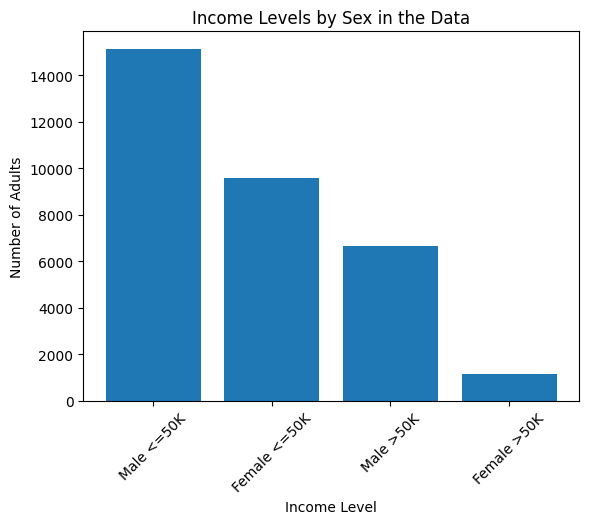

In [ ]:
adult.loc[(adult['Income'] == ' <=50K') & (adult['Sex'] == ' Male'), 'Income by Sex'] = 'Male <=50K'
adult.loc[(adult['Income'] == ' <=50K') & (adult['Sex'] == ' Female'), 'Income by Sex'] = 'Female <=50K'
adult.loc[(adult['Income'] == ' >50K') & (adult['Sex'] == ' Male'), 'Income by Sex'] = 'Male >50K'
adult.loc[(adult['Income'] == ' >50K') & (adult['Sex'] == ' Female'), 'Income by Sex'] = 'Female >50K'

income_by_sex_labels = adult["Income by Sex"].unique()
income_by_sex_counts = adult["Income by Sex"].value_counts()

plt.bar(income_by_sex_labels, income_by_sex_counts)

plt.title('Income Levels by Sex in the Data')
plt.xlabel('Income Level')
plt.ylabel('Number of Adults')
plt.xticks(rotation = 45)

plt.show()

##### **Follow Up**

This visual is extremely important. If we were to use sex in our model, we could easily be overfitting to the female population since our dataset for that section is much smaller than the rest of the data. Furthermore, there is not even 2,000 data points for females earning over 50K (less than 6% of our data).

#### **Problem #11**

Visualize the fraction of females that made above 50K and males that made above 50K.

<br>

**Hint**: Remember that we created very similar visualizations with the Titanic dataset on Day 4 with a binary target variable.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

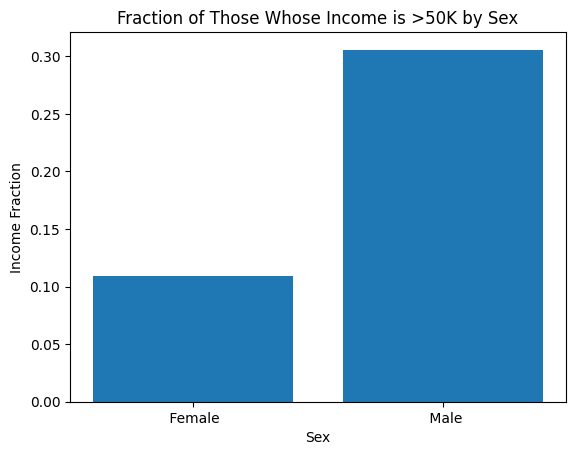

In [ ]:
grouped_data = adult.groupby('Sex')
inc_frac = grouped_data['Income >50K'].mean()

x_values = inc_frac.index
plt.bar(x_values, inc_frac)

plt.xlabel('Sex')
plt.ylabel('Income Fraction')
plt.title('Fraction of Those Whose Income is >50K by Sex')

plt.show()

#### **Problem #12**

Visualize the fraction that made above 50K for each race present in the dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

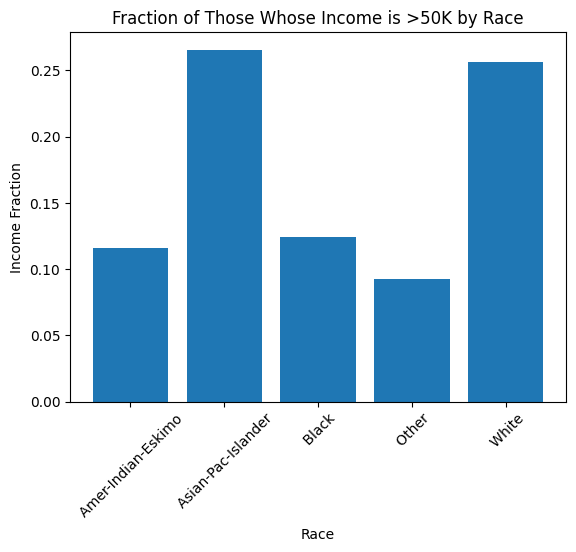

In [ ]:
grouped_data = adult.groupby('Race')
inc_frac = grouped_data['Income >50K'].mean()

x_values = inc_frac.index
plt.bar(x_values, inc_frac)

plt.xlabel('Race')
plt.ylabel('Income Fraction')
plt.title('Fraction of Those Whose Income is >50K by Race')

plt.xticks(rotation = 45)
plt.show()

#### **Problem #13**

Visualize the fraction that made above 50K for each country of origin present in the dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

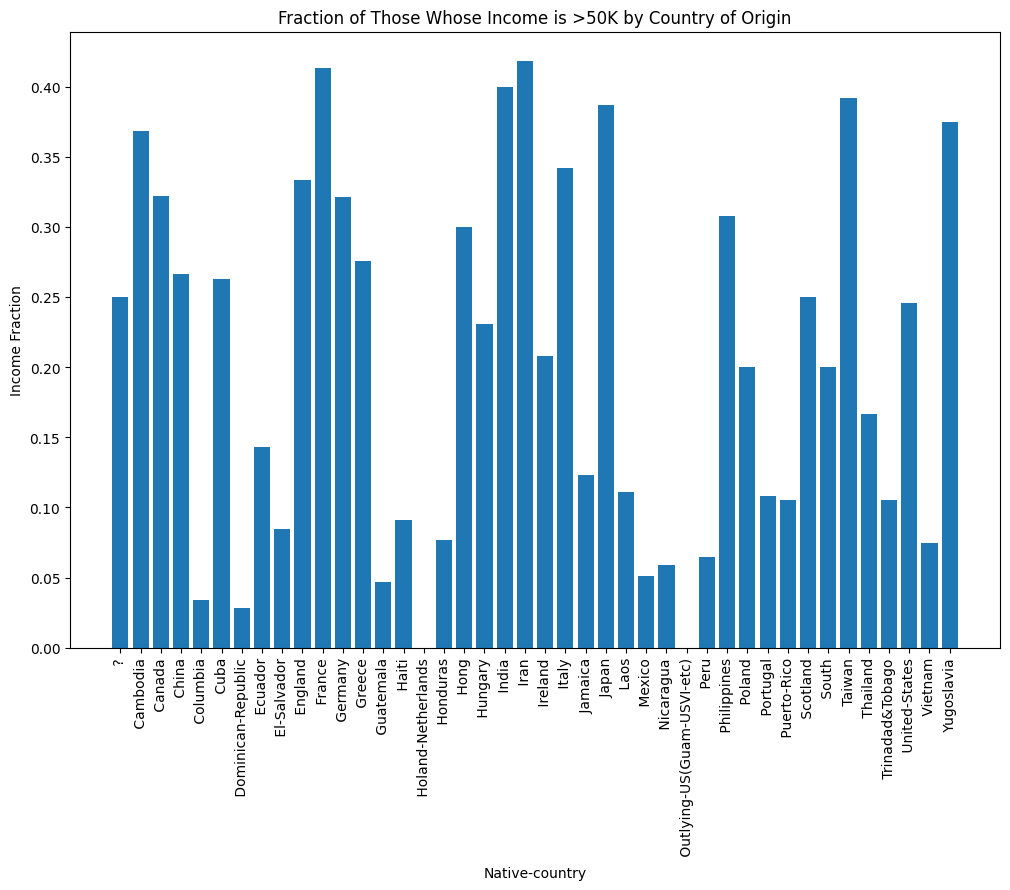

In [ ]:
grouped_data = adult.groupby('Native-country')
inc_frac = grouped_data['Income >50K'].mean()

x_values = inc_frac.index

plt.figure(figsize = (12, 8))
plt.bar(x_values, inc_frac)

plt.xlabel('Native-country')
plt.ylabel('Income Fraction')
plt.title('Fraction of Those Whose Income is >50K by Country of Origin')

plt.xticks(rotation = 90)
plt.show()

#### **Problem #14**

Visualize the fraction that made above 50K for each marital status of origin present in the dataset.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

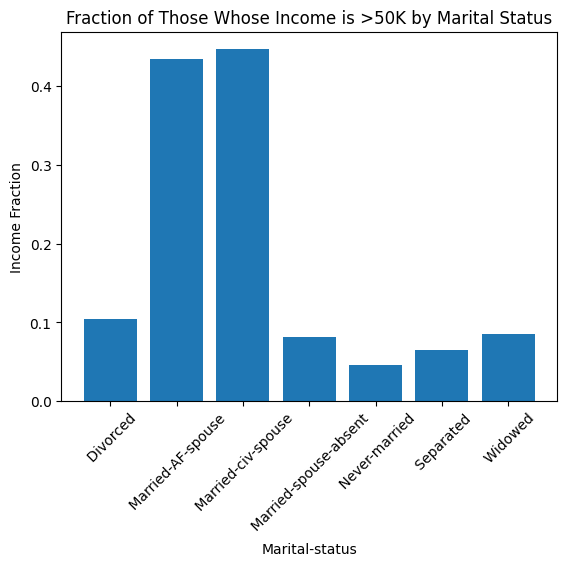

In [ ]:
grouped_data = adult.groupby('Marital-status')
inc_frac = grouped_data['Income >50K'].mean()

x_values = inc_frac.index

plt.bar(x_values, inc_frac)

plt.xlabel('Marital-status')
plt.ylabel('Income Fraction')
plt.title('Fraction of Those Whose Income is >50K by Marital Status')

plt.xticks(rotation = 45)
plt.show()

#### **Problem #15**

Now, let's begin our modeling process. Specifically,
* Determine the features and label for classifying entries as income above or below 50K. **NOTE**: Since we have two versions of the label (one numerical and one non-numerical), make sure to *drop* the one you don't use.
* In order to avoid any possibility of data leakage, split the dataset into training and test sets.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# Define features and target
features = adult.drop(columns = ['Income', 'Income >50K'])
label = adult['Income >50K']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Problem #16**

Now, scale the numerical features appropriately. **NOTE**: You will get a runtime error if you try to scale any non-numerical features.

<br>

**HINT**: There are several ways to do this such as manually selecting only the numerical columns to scale or using the pandas method, [`.select_dtypes(...)`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), on the X data. Then you can scale and update *only* these columns in the training and test sets.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
numerical_features = X_train.select_dtypes(include='int64').columns

print(numerical_features)

Index(['Age', 'Final-Weight', 'Education-number-of-years', 'Capital-gain',
       'Capital-loss', 'Hours-per-week'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#### **Problem #17**

Lastly, encode any categorical features and make sure to drop the non-encoded ones.

<br>

**HINT**: You can use the same type of approaches as above to specifically select the `'object'` type columns.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
categorical_features = X_train.select_dtypes(include='object').columns

print(categorical_features)

Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-country'],
      dtype='object')


In [ ]:
ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[categorical_features])

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

['Workclass_ ?' 'Workclass_ Federal-gov' 'Workclass_ Local-gov'
 'Workclass_ Never-worked' 'Workclass_ Private' 'Workclass_ Self-emp-inc'
 'Workclass_ Self-emp-not-inc' 'Workclass_ State-gov'
 'Workclass_ Without-pay' 'Education_ 10th' 'Education_ 11th'
 'Education_ 12th' 'Education_ 1st-4th' 'Education_ 5th-6th'
 'Education_ 7th-8th' 'Education_ 9th' 'Education_ Assoc-acdm'
 'Education_ Assoc-voc' 'Education_ Bachelors' 'Education_ Doctorate'
 'Education_ HS-grad' 'Education_ Masters' 'Education_ Preschool'
 'Education_ Prof-school' 'Education_ Some-college'
 'Marital-status_ Divorced' 'Marital-status_ Married-AF-spouse'
 'Marital-status_ Married-civ-spouse'
 'Marital-status_ Married-spouse-absent' 'Marital-status_ Never-married'
 'Marital-status_ Separated' 'Marital-status_ Widowed' 'Occupation_ ?'
 'Occupation_ Adm-clerical' 'Occupation_ Armed-Forces'
 'Occupation_ Craft-repair' 'Occupation_ Exec-managerial'
 'Occupation_ Farming-fishing' 'Occupation_ Handlers-cleaners'
 'Occupation

In [ ]:
X_train[ohe_columns] = ohe_enc.transform(X_train[categorical_features])
X_test[ohe_columns] = ohe_enc.transform(X_test[categorical_features])

X_train = X_train.drop(columns = categorical_features)
X_test = X_test.drop(columns = categorical_features)

X_train.head()

,Age,Final-Weight,Education-number-of-years,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
5514,-0.408756,0.080051,1.133702,-0.145715,-0.217998,0.779460,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19777,-0.188857,-0.981653,0.357049,-0.145715,4.457168,0.779460,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10781,1.423734,0.126197,-1.972910,-0.145715,-0.217998,-0.031510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32240,-1.288351,-0.090935,0.357049,-0.145715,-0.217998,0.455072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9876,-0.848554,0.856334,-0.031277,-0.145715,-0.217998,-0.031510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### **Problem #18**

Now train the best model possible to predict `Income >50K` based on the numerical features provided. Make sure to compare your models using K-Folds CV instead of the test set to avoid data leakage and misinterpretations of the models' true abilities as much as possible.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)

scores_3 = cross_val_score(knn_3, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_3.mean()) + " +/- " + str(scores_3.std()))

10-Folds CV Scores: 0.8248623850506087 +/- 0.006728430976459308


In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

10-Folds CV Scores: 0.8319259016838114 +/- 0.005817345314005069


In [ ]:
sqrt = int(len(X_train)**(1/2))
print(sqrt)

knn_sqrt = KNeighborsClassifier(n_neighbors = sqrt)

scores_sqrt = cross_val_score(knn_sqrt, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_sqrt.mean()) + " +/- " + str(scores_sqrt.std()))

161
10-Folds CV Scores: 0.8373773258916595 +/- 0.003281057777874756


In [ ]:
knn_555 = KNeighborsClassifier(n_neighbors = 555)

scores_555 = cross_val_score(knn_555, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_555.mean()) + " +/- " + str(scores_555.std()))

10-Folds CV Scores: 0.8321561690120912 +/- 0.0032217775332287328


In [ ]:
lr = LogisticRegression()

scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_lr.mean()) + " +/- " + str(scores_lr.std()))

10-Folds CV Scores: 0.8510061149095884 +/- 0.003760413899618236


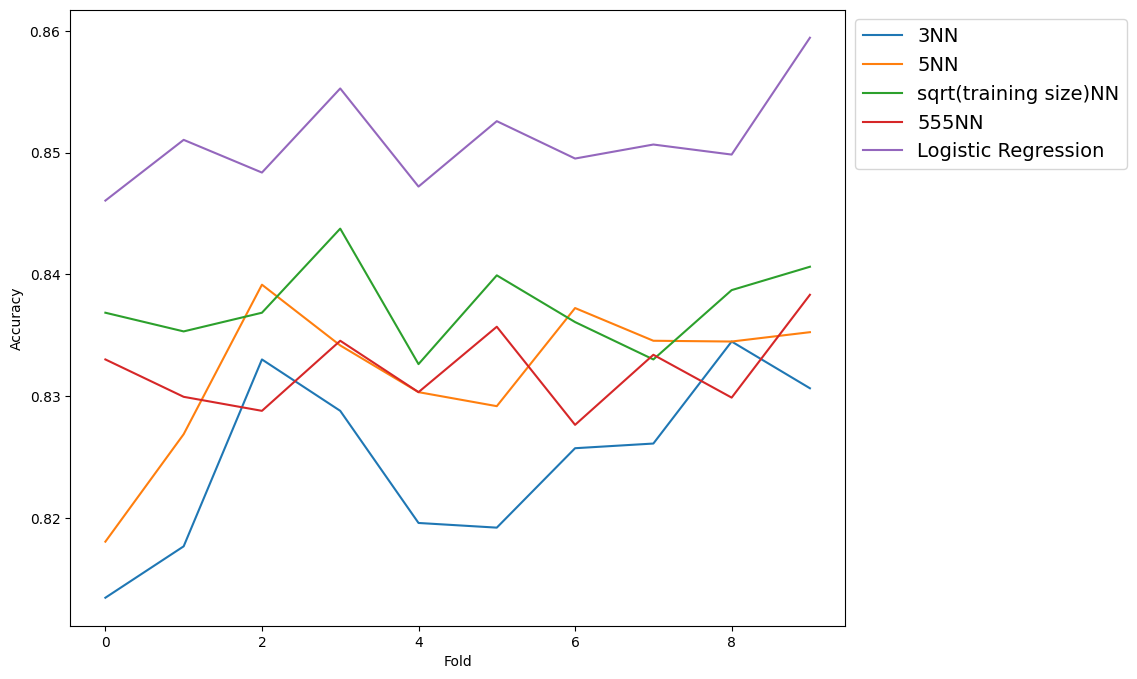

In [ ]:
plt.figure(figsize = (10, 8))

plt.plot(scores_3, label = '3NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_sqrt, label = 'sqrt(training size)NN')
plt.plot(scores_555, label = '555NN')
plt.plot(scores_lr, label = 'Logistic Regression')


plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1), fontsize = 14)

plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


 # Predictions and Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.75      0.62      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



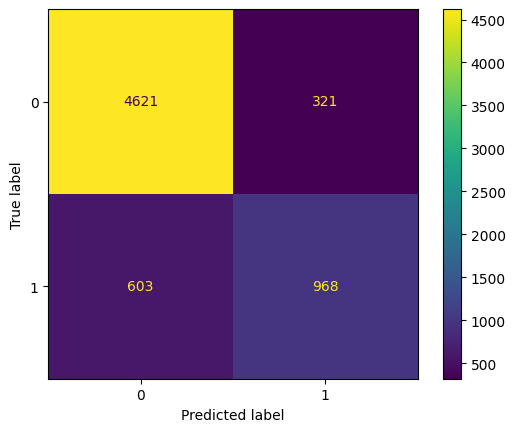

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = model.classes_)

plt.show()

#### **Problem #19**

Infer how important each variable is according to any model that has parameters (linear or logistic regression).

<br>

**NOTE**: Depending on the encoding you performed, there may be *many* features making this a good time to visualize the coefficients for better understanding.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
coefficients = pd.DataFrame(model.coef_, columns = X_train.columns)
coefficients.head()

,Age,Final-Weight,Education-number-of-years,Capital-gain,Capital-loss,Hours-per-week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,0.350975,0.082951,0.729197,2.21616,0.244253,0.361214,-0.220548,0.619014,-0.062303,-0.121018,...,0.209655,-0.467356,0.387347,-0.670353,0.280322,0.22993,-0.113523,0.291086,-0.730701,0.586353


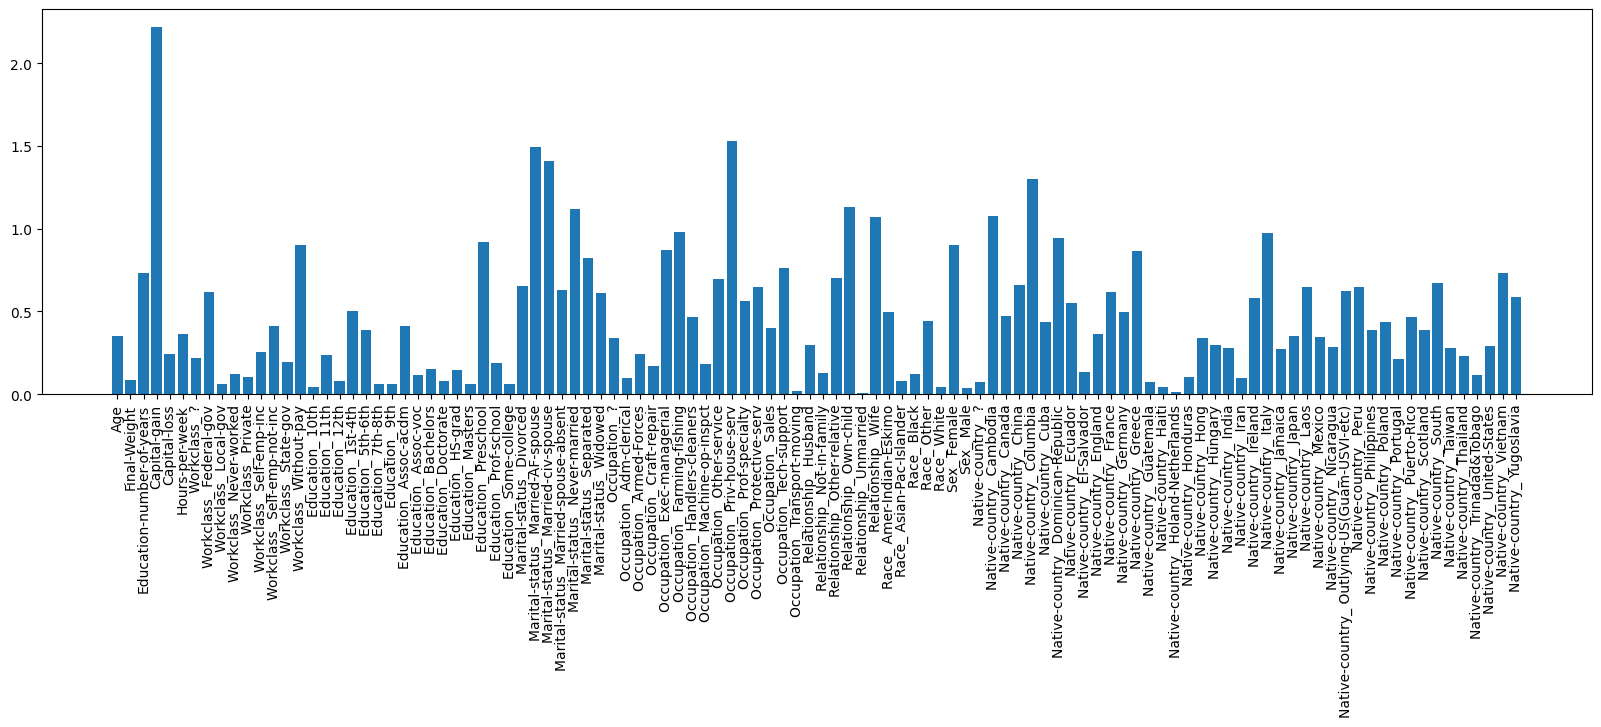

In [ ]:
plt.figure(figsize = (20, 5))

plt.bar(X_train.columns, np.abs(model.coef_[0]))

plt.xticks(rotation=90)

plt.show()

#### **Problem #20**

The code below evaluates the model's ability to classify each sex specifically, which can lend insight into whether it is better able to make predictions for males or females. As a reminder of what these metrics mean, here are the results that we found when running the code below:

The classification reports for males and females provide several key metrics: precision, recall, f1-score, and accuracy. Here's what each metric means and how we can interpret them in this context, along with insights into potential biases:

#### **Metrics Explained**

- **Precision**: The ratio of true positive predictions to the total positive predictions. High precision means that when the model predicts a class, it is often correct.
  
- **Recall**: The ratio of true positive predictions to the total actual positives. High recall means the model is good at capturing actual positives.
  
- **F1-Score**: A combination of precision and recall, providing a single metric to balance them. It's particularly useful when the cost of false positives and false negatives is similar.
  
- **Accuracy**: The ratio of correct predictions (both true positives and true negatives) to the total number of cases. High accuracy indicates overall performance across both classes, but can be misleading if the class distribution is imbalanced.
  
- **Support**: The number of actual occurrences of the class in the dataset.



#### **Male Data Interpretation**
- **Class 0 (Income <=50K)**: High precision (0.85) and recall (0.91) suggest the model is quite effective at identifying males with income <=50K.
- **Class 1 (Income >50K)**: Lower precision (0.76) and recall (0.64) indicate challenges in correctly identifying higher-income males, with a notable portion being missed (lower recall) or incorrectly classified (lower precision).
- **Accuracy**: 0.83 indicates a generally good performance but doesn't capture class-specific disparities.

#### **Female Data Interpretation**
- **Class 0 (Income <=50K)**: Very high precision (0.94) and recall (0.98) suggest the model is highly effective at identifying females with income <=50K, potentially even better than for males.
- **Class 1 (Income >50K)**: Significantly lower precision (0.70) and recall (0.46) for higher-income females indicate the model struggles considerably with this group, missing more than half of the actual positives.
- **Accuracy**: 0.92 is misleadingly high, primarily due to the model's effectiveness at identifying the more prevalent lower-income class.

#### **Indications of Bias**

- **Income >50K (Class 1) Bias**: The substantial drop in recall for females (0.46) compared to males (0.64) suggests a bias against correctly identifying higher-income females. This could be due to various factors, including underrepresentation in training data or features that do not capture female income predictors as effectively.
- **Precision and Recall Disparity**: The significant differences in precision and recall between the two sexes, especially for Class 1, highlight potential biases in how the model interprets and weighs features for males versus females.


<br>

Consider adapting this code to examine how the model performs for a variety of different subsets including different races, education levels, etc.

In [ ]:
for sex in adult['Sex'].unique():

  columns = X_test['Sex_' + sex] == 1

  print("\nClassification Report for Sex = " + sex)
  print(classification_report(y_test[columns], y_pred[columns]))


Classification Report for Sex =  Male
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3049
           1       0.76      0.64      0.70      1338

    accuracy                           0.83      4387
   macro avg       0.81      0.78      0.79      4387
weighted avg       0.82      0.83      0.82      4387


Classification Report for Sex =  Female
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1893
           1       0.70      0.46      0.56       233

    accuracy                           0.92      2126
   macro avg       0.82      0.72      0.76      2126
weighted avg       0.91      0.92      0.91      2126



In [ ]:
# COMPLETE THIS CODE

##### **Solution**

**NOTE**: The solution below is by no means the only way to do it and really prints out too much information. However, this contains all the possible classification reports we might be interested in seeing.

In [ ]:
for category in categorical_features:

  for value in adult[category].unique():

    columns = X_test[category + '_' + value] == 1

    if columns.sum() > 0:
      print("Classification Report for " + category + " = " + value)
      print(classification_report(y_test[columns], y_pred[columns]))
      print("\n")

  print("\n")

Classification Report for Workclass =  State-gov
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       181
           1       0.77      0.68      0.72        73

    accuracy                           0.85       254
   macro avg       0.82      0.80      0.81       254
weighted avg       0.85      0.85      0.85       254



Classification Report for Workclass =  Self-emp-not-inc
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       341
           1       0.67      0.48      0.56       157

    accuracy                           0.76       498
   macro avg       0.73      0.69      0.70       498
weighted avg       0.75      0.76      0.75       498



Classification Report for Workclass =  Private
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3577
           1       0.77      0.61      0.68      1001

    accuracy              

---

## **[OPTIONAL] Homework**

---


You have officially seen all of the material in this course–congratulations! As you prepare for the last day, we recommend that you review the optional notebook problems, reflect on what topics you feel most and least comfortable with, and consider the following open-ended questions

1. What role does EDA play in the ML process in practice? How important is it, when do you perform it, and what are the disadvantages or risks of not performing any EDA?

1. One view of machine learning models is as “opinions informed by training data”. What do you think of this based on your experiences in this course and why might this be a meaningful perspective? When might this perspective not apply?

1. Some models are more easily interpreted than others. For instance, you can look at the parameters of a linear regression or logistic regression model and understand how predictions relate to certain features. On the other hand, the patterns that KNN picks up on are not usually very clear. When is it valuable to have an easily interpreted model? Are there any advantages to a less interpretable model?

1. Are there any specific discussions or topics from the bootcamp that you might be able to bring into your own courses? Are there parts that could be built into existing content or would it require an overhaul of the curriculum?

1. AI and machine learning are inherently interdisciplinary. Are there ways you might be able to collaborate with colleagues from other disciplines (e.g., ethics, sociology, law, physics, etc.) to provide students with a holistic understanding of AI's applications and impact on society?

---
#End of Notebook

© 2024 The Coding School, All rights reserved